In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
DATASET_URL = 'https://github.com/ksranjith786/inventory-sales-prediction/raw/master/data/US%20Superstore%20data.zip'
PATH = 'US_Store_Data'
DATASET = 'US Superstore data.xlsx'

In [ ]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

with urlopen(DATASET_URL) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall(PATH)

In [ ]:
%ls -lrt

total 80
drwxr-xr-x 1 root root  4096 Jul 10 16:29 sample_data/
drwxr-xr-x 2 root root  4096 Jul 29 14:18 US_Store_Data/
-rw-r--r-- 1 root root 73071 Jul 29 15:42 predictions.csv


In [ ]:
df = pd.read_excel(f'{PATH}/{DATASET}', date_parser=['TransactionDateTime', 'Ship Date'])

In [ ]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7229,7230,CA-2014-157546,2014-07-20,2014-07-22,First Class,RD-19720,Roger Demir,Consumer,United States,San Francisco,California,94122,West,OFF-PA-10004569,Office Supplies,Paper,"Wirebound Message Books, Two 4 1/4"" x 5"" Forms...",22.830,3,0.0,10.7301
8318,8319,CA-2017-130904,2017-04-11,2017-04-16,Standard Class,HM-14980,Henry MacAllister,Consumer,United States,Burlington,North Carolina,27217,South,OFF-AR-10000127,Office Supplies,Art,Newell 321,20.992,8,0.2,2.3616
2075,2076,CA-2014-131051,2014-12-01,2014-12-05,Standard Class,TR-21325,Toby Ritter,Consumer,United States,San Francisco,California,94122,West,FUR-FU-10001861,Furniture,Furnishings,"Floodlight Indoor Halogen Bulbs, 1 Bulb per Pa...",58.200,3,0.0,28.5180
9421,9422,CA-2014-145254,2014-07-23,2014-07-27,Standard Class,NC-18535,Nick Crebassa,Corporate,United States,San Francisco,California,94122,West,TEC-PH-10000441,Technology,Phones,VTech DS6151,604.752,6,0.2,60.4752
5199,5200,CA-2016-103982,2016-03-03,2016-03-08,Standard Class,AA-10315,Alex Avila,Consumer,United States,Round Rock,Texas,78664,Central,OFF-FA-10001332,Office Supplies,Fasteners,"Acco Banker's Clasps, 5 3/4""-Long",2.304,1,0.2,0.7776
6576,6577,CA-2017-123085,2017-03-03,2017-03-08,Standard Class,EJ-13720,Ed Jacobs,Consumer,United States,Los Angeles,California,90008,West,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,170.352,3,0.2,-17.0352
5714,5715,CA-2017-116939,2017-09-25,2017-09-29,Standard Class,AG-10900,Arthur Gainer,Consumer,United States,Richmond,Virginia,23223,South,OFF-ST-10001476,Office Supplies,Storage,Steel Personal Filing/Posting Tote,177.550,5,0.0,47.9385
9318,9319,US-2017-108343,2017-07-20,2017-07-25,Standard Class,AR-10825,Anthony Rawles,Corporate,United States,New York City,New York,10009,East,OFF-PA-10000743,Office Supplies,Paper,Xerox 1977,13.360,2,0.0,6.4128
8168,8169,CA-2017-107174,2017-11-06,2017-11-13,Standard Class,AB-10060,Adam Bellavance,Home Office,United States,Seattle,Washington,98105,West,FUR-TA-10004575,Furniture,Tables,Hon 5100 Series Wood Tables,2036.860,7,0.0,366.6348
6629,6630,CA-2015-125696,2015-10-02,2015-10-06,Standard Class,NP-18685,Nora Pelletier,Home Office,United States,Wilson,North Carolina,27893,South,OFF-BI-10001757,Office Supplies,Binders,Pressboard Hanging Data Binders for Unburst Sh...,7.380,5,0.7,-5.4120


In [ ]:
df.drop('Row ID', axis=1, inplace=True)

In [ ]:
df.shape

(9994, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub-Category   9994 non-null   object        
 15  Product Name   9994 n

In [ ]:
df['NetPrice'] = (df['Sales'] - df['Profit']) / df['Quantity']

In [ ]:
df.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,NetPrice
88,CA-2016-159695,2016-04-05,2016-04-10,Second Class,GM-14455,Gary Mitchum,Home Office,United States,Houston,Texas,77095,Central,OFF-ST-10003442,Office Supplies,Storage,Eldon Portable Mobile Manager,158.368,7,0.2,13.8572,20.6444
6092,CA-2017-100111,2017-09-20,2017-09-26,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,New York,10035,East,OFF-PA-10000807,Office Supplies,Paper,"TOPS ""Important Message"" Pads, Canary, 4-1/4 x...",38.520,9,0.0,18.1044,2.2684
3730,CA-2015-109575,2015-09-18,2015-09-23,Standard Class,KH-16630,Ken Heidel,Corporate,United States,Clinton,Maryland,20735,East,OFF-ST-10004123,Office Supplies,Storage,Safco Industrial Wire Shelving System,636.860,7,0.0,0.0000,90.9800
6911,CA-2017-168942,2017-08-01,2017-08-05,Second Class,EM-13960,Eric Murdock,Consumer,United States,San Francisco,California,94109,West,OFF-ST-10004340,Office Supplies,Storage,"Fellowes Mobile File Cart, Black",186.540,3,0.0,50.3658,45.3914
6005,CA-2015-100657,2015-11-02,2015-11-07,Standard Class,SW-20245,Scot Wooten,Consumer,United States,Troy,New York,12180,East,FUR-CH-10003535,Furniture,Chairs,"Global Armless Task Chair, Royal Blue",109.764,2,0.1,8.5372,50.6134


In [ ]:
df.rename(columns={'Order ID': 'TransactionID', 'Order Date': 'TransactionDateTime', 'Ship Date': 'ShipDate', 'Ship Mode': 'ShipMode', 'Sub-Category': 'SubCategory', 'Postal Code':'PostalCode', 'Customer ID': 'CustomerID', 'Customer Name': 'CustomerName', 'Product ID': 'SKU', 'Product Name': 'ProductName'}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionID        9994 non-null   object        
 1   TransactionDateTime  9994 non-null   datetime64[ns]
 2   ShipDate             9994 non-null   datetime64[ns]
 3   ShipMode             9994 non-null   object        
 4   CustomerID           9994 non-null   object        
 5   CustomerName         9994 non-null   object        
 6   Segment              9994 non-null   object        
 7   Country              9994 non-null   object        
 8   City                 9994 non-null   object        
 9   State                9994 non-null   object        
 10  PostalCode           9994 non-null   int64         
 11  Region               9994 non-null   object        
 12  SKU                  9994 non-null   object        
 13  Category             9994 non-nul

In [ ]:
df.describe()

,PostalCode,Sales,Quantity,Discount,Profit,NetPrice
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896,53.120197
std,32063.693350,623.245101,2.225110,0.206452,234.260108,122.251398
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.544500
25%,23223.000000,17.280000,2.000000,0.000000,1.728750,3.473600
50%,56430.500000,54.490000,3.000000,0.200000,8.666500,12.933600
75%,90008.000000,209.940000,5.000000,0.200000,29.364000,54.522000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000,4074.926400


In [ ]:
df['SKU'].unique()

array(['FUR-BO-10001798', 'FUR-CH-10000454', 'OFF-LA-10000240', ...,
       'OFF-AP-10003099', 'TEC-PH-10002645', 'OFF-ST-10001627'],
      dtype=object)

In [ ]:
df['SKU'].nunique()

1862

In [ ]:
df['TransactionDateTime'].min(), df['TransactionDateTime'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
from datetime import datetime

today = datetime.today()
offset = today - df.TransactionDateTime.max()
print(offset.days)

942


In [ ]:
df['TransactionDateTime'] = df['TransactionDateTime'] + pd.DateOffset(offset.days)
df['ShipDate'] = df['ShipDate'] + pd.DateOffset(offset.days)

In [ ]:
df['TransactionDateTime'].min(), df['TransactionDateTime'].max()

(Timestamp('2016-08-02 00:00:00'), Timestamp('2020-07-29 00:00:00'))

In [ ]:
df.loc[:, 'Country'].unique()

array(['United States'], dtype=object)

In [ ]:
df.loc[:, 'State'].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [ ]:
df.loc[:, 'City'].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [ ]:
states = df.loc[:, 'State'].unique()
stateCities = dict()
for state in states:
  stateCities[state] = df.loc[df.loc[:, 'State'] == state, 'City'].nunique()
  
print(stateCities)


{'Kentucky': 8, 'California': 81, 'Florida': 36, 'North Carolina': 19, 'Washington': 17, 'Texas': 54, 'Wisconsin': 13, 'Utah': 10, 'Nebraska': 4, 'Pennsylvania': 8, 'Illinois': 33, 'Minnesota': 13, 'Michigan': 21, 'Delaware': 3, 'Indiana': 15, 'New York': 18, 'Arizona': 13, 'Virginia': 13, 'Tennessee': 15, 'Alabama': 8, 'South Carolina': 6, 'Oregon': 9, 'Colorado': 16, 'Iowa': 8, 'Ohio': 24, 'Missouri': 9, 'Oklahoma': 7, 'New Mexico': 7, 'Louisiana': 5, 'Connecticut': 10, 'New Jersey': 18, 'Massachusetts': 14, 'Georgia': 11, 'Nevada': 5, 'Rhode Island': 4, 'Mississippi': 4, 'Arkansas': 9, 'Montana': 5, 'New Hampshire': 3, 'Maryland': 7, 'District of Columbia': 1, 'Kansas': 5, 'Vermont': 1, 'Maine': 2, 'South Dakota': 3, 'Idaho': 6, 'North Dakota': 1, 'Wyoming': 1, 'West Virginia': 1}


In [ ]:
df.loc[:, 'State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 42
Nevada        

In [ ]:
df.loc[:, 'ProductName'].value_counts()

Staple envelope                                                      48
Staples                                                              46
Easy-staple paper                                                    46
Avery Non-Stick Binders                                              20
Staples in misc. colors                                              19
                                                                     ..
Belkin 7 Outlet SurgeMaster Surge Protector with Phone Protection     1
4009 Highlighters                                                     1
Memorex Mini Travel Drive 4 GB USB 2.0 Flash Drive                    1
Panasonic KX MB2061 Multifunction Printer                             1
Avery 5                                                               1
Name: ProductName, Length: 1850, dtype: int64

In [ ]:
df.loc[df.loc[:, 'TransactionID'] == 'CA-2014-148040']

,TransactionID,TransactionDateTime,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,SKU,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,NetPrice
2870,CA-2014-148040,2016-10-19,2016-10-23,Standard Class,BF-11275,Beth Fritzler,Corporate,United States,Tucson,Arizona,85705,West,OFF-PA-10002581,Office Supplies,Paper,Xerox 1951,74.352,3,0.2,23.2350,17.0390
2871,CA-2014-148040,2016-10-19,2016-10-23,Standard Class,BF-11275,Beth Fritzler,Corporate,United States,Tucson,Arizona,85705,West,FUR-CH-10001482,Furniture,Chairs,Office Star - Mesh Screen back chair with Viny...,314.352,3,0.2,-35.3646,116.5722


In [ ]:
df['Year'] = df['TransactionDateTime'].dt.year
df['Month'] = df['TransactionDateTime'].dt.strftime('%Y-%b')
df['Week'] = df['TransactionDateTime'].dt.week
df['DayOfWeek'] = df['TransactionDateTime'].dt.dayofweek
df['Day'] = df['TransactionDateTime'].dt.day

In [ ]:
df.sample(5)

,TransactionID,TransactionDateTime,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,SKU,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,NetPrice,Year,Month,Week,DayOfWeek,Day
5374,CA-2015-118738,2018-05-23,2018-05-29,Standard Class,AG-10495,Andrew Gjertsen,Corporate,United States,Houston,Texas,77041,Central,OFF-PA-10001166,Office Supplies,Paper,Xerox 2,10.368,2,0.2,3.6288,3.3696,2018,2018-May,21,2,23
5383,CA-2016-149195,2019-04-05,2019-04-07,Second Class,DM-13525,Don Miller,Corporate,United States,Houston,Texas,77070,Central,OFF-PA-10002036,Office Supplies,Paper,Xerox 1930,10.368,2,0.2,3.7584,3.3048,2019,2019-Apr,14,4,5
2356,CA-2015-111514,2018-03-30,2018-04-01,First Class,SC-20260,Scott Cohen,Corporate,United States,San Francisco,California,94122,West,TEC-MA-10000597,Technology,Machines,Lexmark S315 Color Inkjet Printer,239.976,3,0.2,80.9919,52.9947,2018,2018-Mar,13,4,30
5748,CA-2016-113733,2019-07-08,2019-07-12,Standard Class,LH-16900,Lena Hernandez,Consumer,United States,Greenville,North Carolina,27834,South,TEC-AC-10004877,Technology,Accessories,Imation 30456 USB Flash Drive 8GB,16.560,3,0.2,-2.4840,6.3480,2019,2019-Jul,28,0,8
4283,CA-2014-103100,2017-07-19,2017-07-22,First Class,AB-10105,Adrian Barton,Consumer,United States,Indianapolis,Indiana,46203,Central,OFF-BI-10004600,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,1103.970,3,0.0,496.7865,202.3945,2017,2017-Jul,29,2,19


In [ ]:
import plotly.express as px

In [ ]:
px.scatter(data_frame=df, x='TransactionDateTime', y='Sales', size='Sales', color='Category')

Removing the Outliers

In [ ]:
thresholdSales = 2000
df.drop(df[df['Sales'] > thresholdSales].index, inplace=True)

In [ ]:
px.scatter(data_frame=df, x='TransactionDateTime', y='Sales', size='Sales', color='Category')

In [ ]:
import plotly.graph_objects as go

In [ ]:
df_sales_per_week = df.groupby(['Year', 'Week'])['Sales'].sum().reset_index()

In [ ]:
df_sales_per_week.head()

,Year,Week,Sales
0,2016,31,2244.482
1,2016,32,3871.019
2,2016,33,3442.540
3,2016,34,1573.868
4,2016,35,1443.208


In [ ]:
df_sales_per_week.loc[:, 'Year'].unique()

array([2016, 2017, 2018, 2019, 2020])

In [ ]:
for year in df_sales_per_week.loc[:, 'Year'].unique():
  df_plot = df_sales_per_week.loc[df_sales_per_week.loc[:, 'Year'] == year]
  x = df_plot.loc[:, 'Week']
  y = df_plot.loc[:, 'Sales']
  fig = go.Figure(go.Bar(x=x, y=y))
  fig.add_trace(go.Line(x=x, y=y))
  fig.show()

/usr/local/lib/python3.6/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
fig = px.line(df_sales_per_week, x="Week", y="Sales", color='Year', title="Weekly Sales")
fig.show()

In [ ]:
df_sales_per_month = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

In [ ]:
fig = px.line(df_sales_per_month, x="Month", y="Sales", title="Monthly Sales")
fig.show()

In [ ]:
N = 5
topN_products = df['SKU'].value_counts()[:N].index

In [ ]:
df_sales_per_product_id = df.groupby(['Year', 'SKU', 'Month'])['Sales'].count().reset_index()

In [ ]:
df_sales_per_product_id

,Year,SKU,Month,Sales
0,2016,FUR-BO-10000362,2016-Dec,1
1,2016,FUR-BO-10001337,2016-Nov,1
2,2016,FUR-BO-10001337,2016-Oct,1
3,2016,FUR-BO-10001972,2016-Aug,1
4,2016,FUR-BO-10001972,2016-Sep,1
...,...,...,...,...
9169,2020,TEC-PH-10004912,2020-Jun,1
9170,2020,TEC-PH-10004977,2020-Apr,1
9171,2020,TEC-PH-10004977,2020-Feb,1
9172,2020,TEC-PH-10004977,2020-Jul,1


In [ ]:
df_plot = df_sales_per_product_id.loc[df_sales_per_product_id.loc[:, 'SKU'].isin(topN_products)]

In [ ]:
fig = px.bar(df_plot.loc[df_plot.loc[:, 'Year'] == 2014], x="Month", y="Sales", color='SKU', title="Monthly SKU Sales")
fig.show()

In [ ]:
fig = px.bar(df_plot.loc[df_plot.loc[:, 'Year'] == 2015], x="Month", y="Sales", color='SKU', title="Monthly SKU Sales")
fig.show()

In [ ]:
fig = px.bar(df_plot.loc[df_plot.loc[:, 'Year'] == 2016], x="Month", y="Sales", color='SKU', title="Monthly SKU Sales")
fig.show()

In [ ]:
fig = px.bar(df_plot.loc[df_plot.loc[:, 'Year'] == 2017], x="Month", y="Sales", color='SKU', title="Monthly SKU Sales")
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9854 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionID        9854 non-null   object        
 1   TransactionDateTime  9854 non-null   datetime64[ns]
 2   ShipDate             9854 non-null   datetime64[ns]
 3   ShipMode             9854 non-null   object        
 4   CustomerID           9854 non-null   object        
 5   CustomerName         9854 non-null   object        
 6   Segment              9854 non-null   object        
 7   Country              9854 non-null   object        
 8   City                 9854 non-null   object        
 9   State                9854 non-null   object        
 10  PostalCode           9854 non-null   int64         
 11  Region               9854 non-null   object        
 12  SKU                  9854 non-null   object        
 13  Category             9854 non-nul

In [ ]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
df['SubCategory'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [ ]:
from fbprophet import Prophet

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [ ]:
df_Train = df.loc[:, ['TransactionDateTime', 'Sales']]

In [ ]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9854 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionDateTime  9854 non-null   datetime64[ns]
 1   Sales                9854 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 231.0 KB


In [ ]:
df_Train.sort_values(by='TransactionDateTime', ascending=True, inplace=True)

In [ ]:
df_Train['TransactionDateTime'][:500].value_counts()

2016-10-14    19
2016-08-19    17
2016-11-03    13
2016-11-02    12
2016-10-11    11
              ..
2016-08-10     1
2016-11-13     1
2016-12-14     1
2016-08-04     1
2016-09-20     1
Name: TransactionDateTime, Length: 111, dtype: int64

In [ ]:
df_Train = df_Train.set_index('TransactionDateTime')
daily_df = df_Train.resample('D').mean()
df_Train.reset_index()
d_df = daily_df.reset_index().dropna()

In [ ]:
d_df['Sales'] = np.log(d_df['Sales'])

In [ ]:
d_df.columns = ['ds', 'y']

In [ ]:
d_df.head()

,ds,y
0,2016-08-02,2.800204
1,2016-08-03,4.564557
2,2016-08-04,2.972259
3,2016-08-05,5.434420
4,2016-08-06,3.774575


In [ ]:
d_df['ds'].min(), d_df['ds'].max()

(Timestamp('2016-08-02 00:00:00'), Timestamp('2020-07-29 00:00:00'))

In [ ]:
m = Prophet()
m.fit(d_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=12, freq="m")
future.tail()

,ds
1242,2021-02-28
1243,2021-03-31
1244,2021-04-30
1245,2021-05-31
1246,2021-06-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1242,2021-02-28,4.682613,3.554164,5.817007
1243,2021-03-31,4.850577,3.711093,5.893115
1244,2021-04-30,5.027147,3.885853,6.106092
1245,2021-05-31,4.961594,3.899709,6.203280
1246,2021-06-30,5.105273,4.020210,6.234823


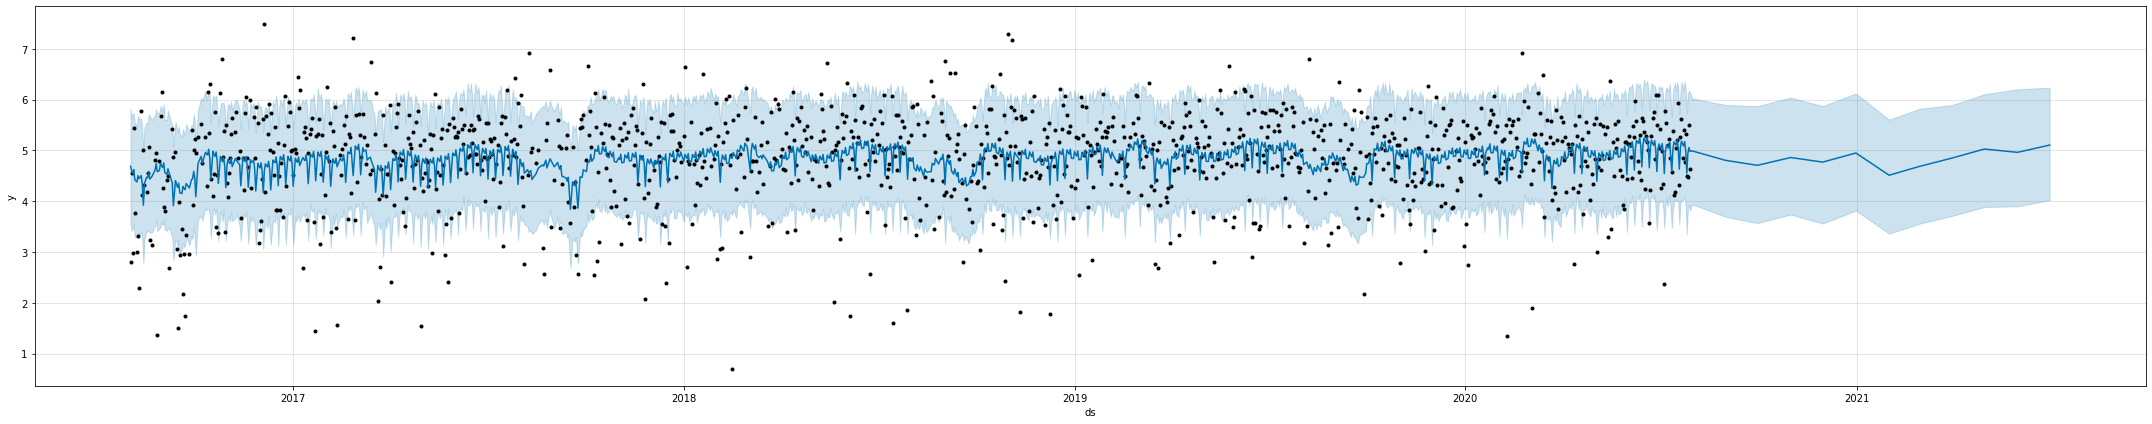

In [ ]:
fig1 = m.plot(forecast, uncertainty=True, figsize=(30,6))

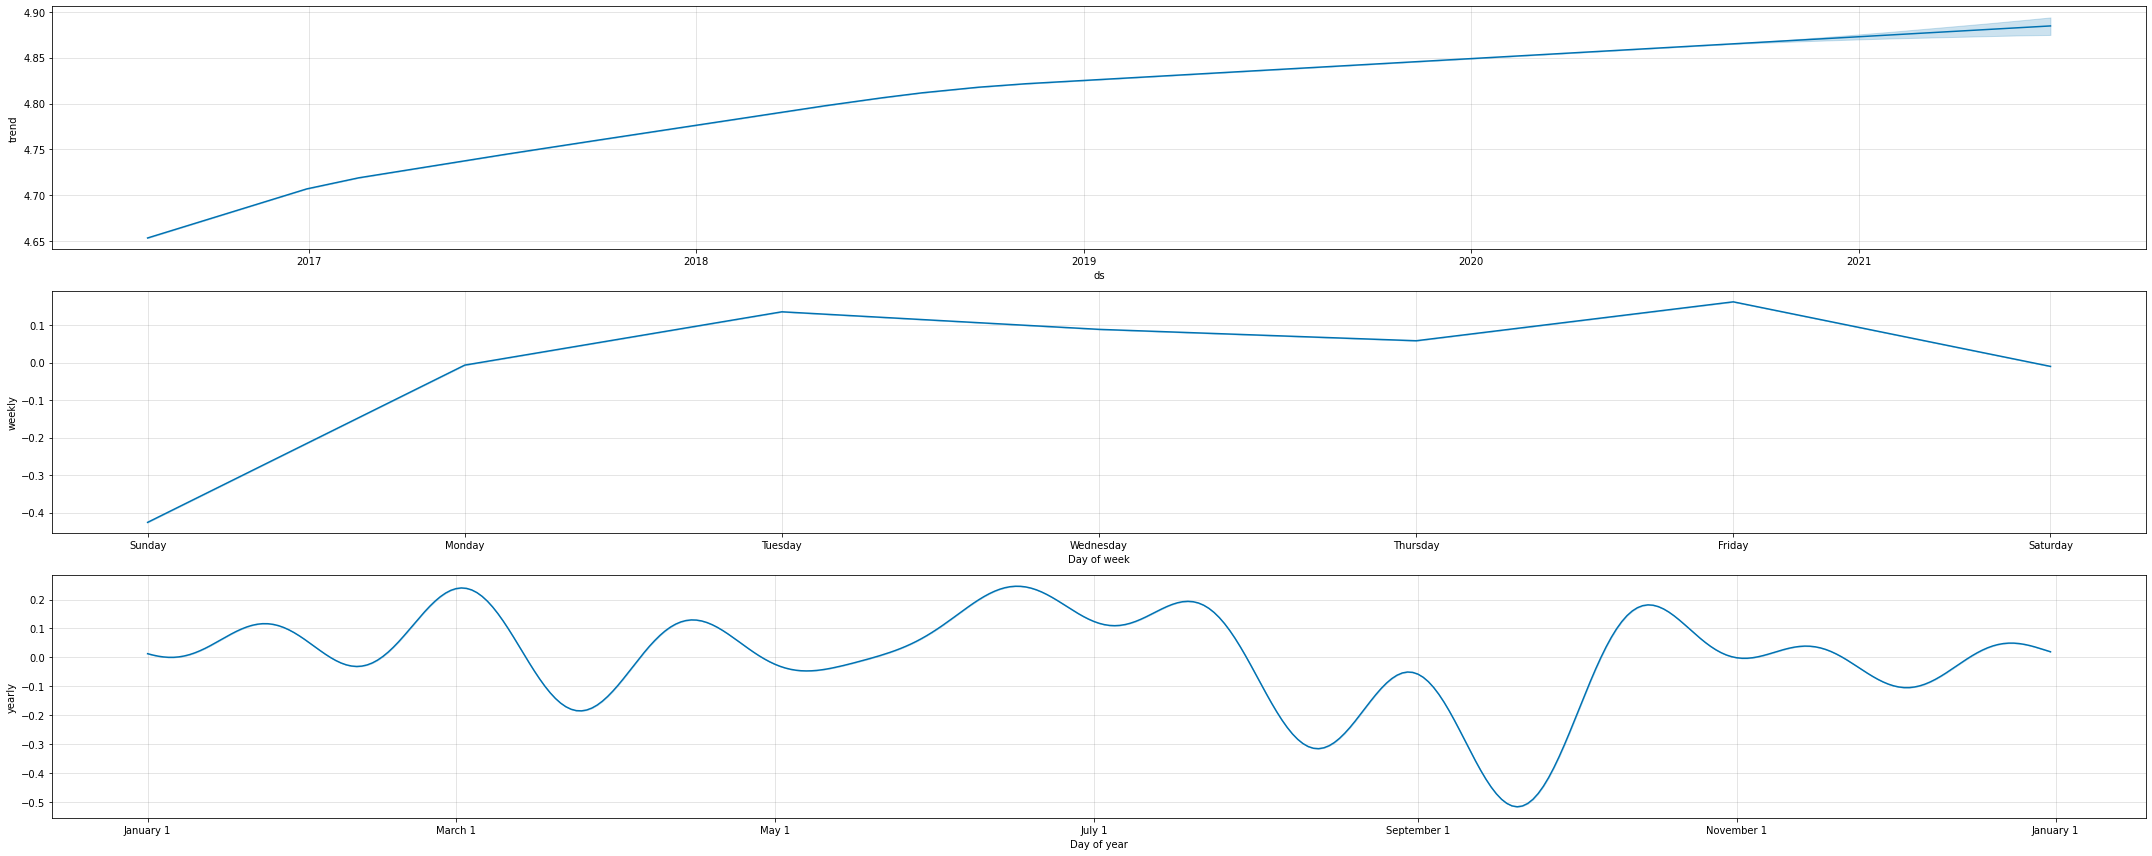

In [ ]:
fig2 = m.plot_components(forecast, figsize=(30,12))

In [ ]:
from fbprophet.plot import plot_plotly

fig = plot_plotly(m, forecast, figsize=(1600, 900))
fig.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-08-02,4.653612,3.551778,5.824069,4.653612,4.653612,0.034223,0.034223,0.034223,0.135105,0.135105,0.135105,-0.100882,-0.100882,-0.100882,0.0,0.0,0.0,4.687835
1,2016-08-03,4.653969,3.415635,5.643125,4.653969,4.653969,-0.045468,-0.045468,-0.045468,0.088330,0.088330,0.088330,-0.133798,-0.133798,-0.133798,0.0,0.0,0.0,4.608501
2,2016-08-04,4.654326,3.453510,5.739308,4.654326,4.654326,-0.107578,-0.107578,-0.107578,0.057987,0.057987,0.057987,-0.165565,-0.165565,-0.165565,0.0,0.0,0.0,4.546748
3,2016-08-05,4.654683,3.544650,5.708977,4.654683,4.654683,-0.033915,-0.033915,-0.033915,0.161656,0.161656,0.161656,-0.195571,-0.195571,-0.195571,0.0,0.0,0.0,4.620768
4,2016-08-06,4.655040,3.291045,5.547990,4.655040,4.655040,-0.233544,-0.233544,-0.233544,-0.010312,-0.010312,-0.010312,-0.223232,-0.223232,-0.223232,0.0,0.0,0.0,4.421496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,2021-02-28,4.876629,3.554164,5.817007,4.871720,4.881035,-0.194016,-0.194016,-0.194016,-0.425856,-0.425856,-0.425856,0.231840,0.231840,0.231840,0.0,0.0,0.0,4.682613
1243,2021-03-31,4.878650,3.711093,5.893115,4.872573,4.884140,-0.028073,-0.028073,-0.028073,0.088330,0.088330,0.088330,-0.116403,-0.116403,-0.116403,0.0,0.0,0.0,4.850577
1244,2021-04-30,4.880605,3.885853,6.106092,4.873406,4.887175,0.146542,0.146542,0.146542,0.161656,0.161656,0.161656,-0.015114,-0.015114,-0.015114,0.0,0.0,0.0,5.027147
1245,2021-05-31,4.882626,3.899709,6.203280,4.874228,4.890478,0.078968,0.078968,0.078968,-0.006911,-0.006911,-0.006911,0.085879,0.085879,0.085879,0.0,0.0,0.0,4.961594


In [ ]:
d_df

,ds,y
0,2016-08-02,2.800204
1,2016-08-03,4.564557
2,2016-08-04,2.972259
3,2016-08-05,5.434420
4,2016-08-06,3.774575
...,...,...
1453,2020-07-25,5.316395
1454,2020-07-26,4.486589
1455,2020-07-27,4.468537
1456,2020-07-28,5.492902


In [ ]:
out_df = forecast[['ds', 'yhat']]
out_df.set_index('ds', inplace=True)

In [ ]:
in_df = d_df.copy()
in_df.set_index('ds', inplace=True)

out_df['y'] = in_df['y']
out_df = out_df.reset_index()

In [ ]:
metrics_df = out_df[out_df['ds'] <= df['TransactionDateTime'].max()]
out_df

,ds,yhat,y
0,2016-08-02,4.687835,2.800204
1,2016-08-03,4.608501,4.564557
2,2016-08-04,4.546748,2.972259
3,2016-08-05,4.620768,5.434420
4,2016-08-06,4.421496,3.774575
...,...,...,...
1242,2021-02-28,4.682613,NaN
1243,2021-03-31,4.850577,NaN
1244,2021-04-30,5.027147,NaN
1245,2021-05-31,4.961594,NaN


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

mae = mean_absolute_error(y_true=metrics_df['y'], y_pred=metrics_df['yhat'])
mse = mean_squared_error(y_true=metrics_df['y'], y_pred=metrics_df['yhat'])
msle = mean_squared_log_error(y_true=metrics_df['y'], y_pred=metrics_df['yhat'])

print(f'Prophet model has MAE {mae:0.4f} - MSE {mse:0.4f} - MSLE {msle:0.4f}')

Prophet model has MAE 0.6599 - MSE 0.7697 - MSLE 0.0295


Prophet model has MAE 0.6598 - MSE 0.7695 - MSLE 0.0295

In [ ]:
del out_df, in_df, metrics_df

In [ ]:
df.sample(5)

,TransactionID,TransactionDateTime,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,SKU,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,NetPrice,Year,Month,Week,DayOfWeek,Day
1678,CA-2014-122882,2017-04-06,2017-04-12,Standard Class,SB-20290,Sean Braxton,Corporate,United States,Philadelphia,Pennsylvania,19134,East,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",64.784,1,0.2,-14.5764,79.3604,2017,2017-Apr,14,3,6
5692,US-2015-138093,2018-07-09,2018-07-15,Standard Class,KM-16225,Kalyca Meade,Corporate,United States,Baltimore,Maryland,21215,East,TEC-PH-10004667,Technology,Phones,Cisco 8x8 Inc. 6753i IP Business Phone System,134.990,1,0.0,36.4473,98.5427,2018,2018-Jul,28,0,9
3848,CA-2017-161053,2020-04-21,2020-04-22,First Class,JE-15745,Joel Eaton,Consumer,United States,Fayetteville,Arkansas,72701,South,OFF-BI-10004318,Office Supplies,Binders,Ibico EB-19 Dual Function Manual Binding System,691.960,4,0.0,318.3016,93.4146,2020,2020-Apr,17,1,21
439,CA-2017-157252,2019-08-20,2019-08-23,Second Class,CV-12805,Cynthia Voltz,Corporate,United States,New York City,New York,10024,East,FUR-CH-10003396,Furniture,Chairs,Global Deluxe Steno Chair,207.846,3,0.1,2.3094,68.5122,2019,2019-Aug,34,1,20
378,CA-2015-130792,2017-11-25,2017-12-02,Standard Class,RA-19915,Russell Applegate,Consumer,United States,Houston,Texas,77095,Central,OFF-AP-10000696,Office Supplies,Appliances,Holmes Odor Grabber,8.652,3,0.8,-20.3322,9.6614,2017,2017-Nov,47,5,25


In [ ]:
df['SKU'].nunique()

1846

In [ ]:
df['SKU'].value_counts()

OFF-PA-10001970    19
TEC-AC-10003832    17
FUR-FU-10004270    16
FUR-CH-10001146    15
FUR-CH-10002647    15
                   ..
TEC-MA-10000904     1
TEC-MA-10003589     1
TEC-MA-10003246     1
TEC-MA-10002937     1
TEC-MA-10003329     1
Name: SKU, Length: 1846, dtype: int64

In [ ]:
thresholdNProducts = 10
indexNProducts = (df['SKU'].value_counts() >= thresholdNProducts).sum()
print(indexNProducts)

126


In [ ]:
df['SKU'].value_counts()[:indexNProducts].index

Index(['OFF-PA-10001970', 'TEC-AC-10003832', 'FUR-FU-10004270',
       'FUR-CH-10001146', 'FUR-CH-10002647', 'TEC-AC-10003628',
       'FUR-CH-10002880', 'OFF-PA-10002377', 'FUR-CH-10003774',
       'FUR-FU-10001473',
       ...
       'OFF-AP-10001205', 'OFF-BI-10003910', 'FUR-CH-10000988',
       'OFF-BI-10001249', 'TEC-PH-10003012', 'OFF-ST-10004804',
       'OFF-BI-10000050', 'FUR-FU-10000010', 'OFF-ST-10001496',
       'OFF-ST-10004340'],
      dtype='object', length=126)

In [ ]:
topNProducts = list(df['SKU'].value_counts()[:indexNProducts].index)

In [ ]:
df_temp = df[['TransactionDateTime', 'SKU', 'Quantity']]
minDate = df['TransactionDateTime'].min()
maxDate = df['TransactionDateTime'].max()
df_emptyDateIndex = pd.DataFrame(index=pd.date_range(start=minDate, end=maxDate, freq="7d"), columns=['Quantity']).fillna(0)
df_emptyDateIndex.index.rename("TransactionDateTime", inplace=True)
df_topNProducts = dict()
for sku in topNProducts:
  df_empty_temp = df_emptyDateIndex.copy()
  df_sku_temp = df_temp[df_temp['SKU'] == sku].groupby('TransactionDateTime')['Quantity'].sum().reset_index().set_index('TransactionDateTime')
  df_topNProducts[sku] = pd.concat([df_sku_temp, df_empty_temp], join='outer')
  

In [ ]:
df_temp[df_temp['SKU'] == 'OFF-PA-10001970']['Quantity'].sum()

70

In [ ]:
df_sku_temp = df_temp[df_temp['SKU'] == 'OFF-PA-10001970'].groupby('TransactionDateTime')['Quantity'].sum().reset_index().set_index('TransactionDateTime')
df_sku_temp

,Quantity
TransactionDateTime,
2017-02-07,4
2017-09-15,3
2018-04-03,5
2018-04-04,3
2018-04-19,5
2018-07-03,7
2018-11-26,3
2019-01-10,7
2019-04-01,6


In [ ]:
df_empty_temp = df_emptyDateIndex.copy()
df_empty_temp

,Quantity
TransactionDateTime,
2016-08-02,0
2016-08-09,0
2016-08-16,0
2016-08-23,0
2016-08-30,0
...,...
2020-06-30,0
2020-07-07,0
2020-07-14,0


In [ ]:
df_empty_temp.update(df_sku_temp)
df_empty_temp.combine_first(df_sku_temp)
df_empty_temp['Quantity'].sum()

21.0

In [ ]:
df_tt = df_topNProducts['OFF-PA-10001970']
print(df_tt[df_tt['Quantity'] > 0])
print(df_tt['Quantity'].sum())

                     Quantity
TransactionDateTime          
2017-02-07                  4
2017-09-15                  3
2018-04-03                  5
2018-04-04                  3
2018-04-19                  5
2018-07-03                  7
2018-11-26                  3
2019-01-10                  7
2019-04-01                  6
2019-05-14                  2
2019-06-18                  2
2019-08-19                  1
2019-09-26                  4
2020-01-19                  8
2020-01-31                  2
2020-03-06                  2
2020-07-07                  1
2020-07-19                  5
70


In [ ]:
def prophetModel(df, period, frequency):
  m = Prophet()
  #m.add_country_holidays(country_name='US')
  m.fit(df)
  future = m.make_future_dataframe(periods=period, freq=frequency)
  forecast = m.predict(future)
  return forecast

In [ ]:
df_toModel = df_topNProducts['OFF-PA-10001970'].reset_index().dropna()
df_toModel.columns = ['ds', 'y']
#df_toModel['y'] = np.log(df_toModel['y'])
#df_toModelTrain = df_toModel[:int(df_toModel.shape[0] * 0.8)]
df_toModelTrain = df_toModel
df_forecastProduct = prophetModel(df_toModelTrain, 2, "w") # 21 days
df_forecastProduct[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(50)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
179,2019-10-08,-0.176468,-1.084241,0.723511
180,2019-10-15,-0.076012,-0.979395,0.775963
181,2019-10-22,-0.008907,-0.837348,0.882159
182,2019-10-29,-0.035698,-0.867799,0.857820
183,2019-11-05,-0.108280,-1.011715,0.757499
184,2019-11-12,-0.136127,-0.959020,0.712261
185,2019-11-19,-0.093965,-0.907164,0.823877
186,2019-11-26,-0.044397,-0.900892,0.836927
187,2019-12-03,-0.055445,-0.900958,0.779573
188,2019-12-10,-0.115197,-0.962171,0.780124


In [ ]:
forecastNProducts = dict()
period = 2
frequency = "w"
for key in df_topNProducts.keys():
  df_toModel = df_topNProducts[key].reset_index().dropna()
  df_toModel.columns = ['ds', 'y']
  df_forecastProduct = prophetModel(df_toModel, period, frequency) # for 3 weeks
  forecastNProducts[key] = df_forecastProduct.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=Tru

In [ ]:
print(forecastNProducts['OFF-PA-10001970'])

            ds     trend  ...  multiplicative_terms_upper      yhat
224 2020-07-19  2.997336  ...                         0.0  6.419415
225 2020-07-21  2.996985  ...                         0.0 -0.189994
226 2020-07-28  2.995755  ...                         0.0 -0.242215
227 2020-08-02  2.994877  ...                         0.0  6.339446
228 2020-08-09  2.993648  ...                         0.0  6.342689

[5 rows x 19 columns]


In [ ]:
df.loc[df.loc[:, 'SKU'] == 'OFF-PA-10000587']

,TransactionID,TransactionDateTime,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,SKU,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,NetPrice,Year,Month,Week,DayOfWeek,Day
58,CA-2016-111682,2019-01-15,2019-01-16,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,New York,12180,East,OFF-PA-10000587,Office Supplies,Paper,"Array Parchment Paper, Assorted Colors",14.560,2,0.0,6.9888,3.7856,2019,2019-Jan,3,1,15
3509,CA-2014-166863,2017-01-17,2017-01-21,Standard Class,SC-20020,Sam Craven,Consumer,United States,Plano,Texas,75023,Central,OFF-PA-10000587,Office Supplies,Paper,"Array Parchment Paper, Assorted Colors",11.648,2,0.2,4.0768,3.7856,2017,2017-Jan,3,1,17
6058,CA-2014-107524,2016-09-29,2016-10-05,Standard Class,KN-16705,Kristina Nunn,Home Office,United States,New York City,New York,10009,East,OFF-PA-10000587,Office Supplies,Paper,"Array Parchment Paper, Assorted Colors",36.400,5,0.0,17.4720,3.7856,2016,2016-Sep,39,3,29
9856,CA-2014-120950,2017-06-05,2017-06-10,Standard Class,GA-14515,George Ashbrook,Consumer,United States,Columbus,Georgia,31907,South,OFF-PA-10000587,Office Supplies,Paper,"Array Parchment Paper, Assorted Colors",43.680,6,0.0,20.9664,3.7856,2017,2017-Jun,23,0,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9854 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionID        9854 non-null   object        
 1   TransactionDateTime  9854 non-null   datetime64[ns]
 2   ShipDate             9854 non-null   datetime64[ns]
 3   ShipMode             9854 non-null   object        
 4   CustomerID           9854 non-null   object        
 5   CustomerName         9854 non-null   object        
 6   Segment              9854 non-null   object        
 7   Country              9854 non-null   object        
 8   City                 9854 non-null   object        
 9   State                9854 non-null   object        
 10  PostalCode           9854 non-null   int64         
 11  Region               9854 non-null   object        
 12  SKU                  9854 non-null   object        
 13  Category             9854 non-nul

In [ ]:
df11 = df.groupby('SKU')['ProductName', 'NetPrice'].max().reset_index()
df11['Quantity'] = np.random.choice([2, 5], df11.shape[0])

In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1846 entries, 0 to 1845
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SKU          1846 non-null   object 
 1   ProductName  1846 non-null   object 
 2   NetPrice     1846 non-null   float64
 3   Quantity     1846 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 57.8+ KB


In [ ]:
#df11.to_csv('inventory.csv')

In [ ]:
#df.to_csv('tranactions.csv')

In [ ]:
import fbprophet as prophet
prophet.__version__


'0.6'

In [ ]:
import pickle

In [ ]:
df_Products = df.groupby(['SKU', 'ProductName'])['CustomerID'].max().reset_index()[['SKU', 'ProductName']]
df_Products.sample(5)

,SKU,ProductName
1278,OFF-PA-10004255,Xerox 219
999,OFF-LA-10003190,Avery 474
820,OFF-BI-10004182,Economy Binders
603,OFF-AR-10003727,Berol Giant Pencil Sharpener
1624,TEC-AC-10004901,Kensington SlimBlade Notebook Wireless Mouse w...


In [ ]:
df_predictedAll = pd.DataFrame()

for key in forecastNProducts.keys():
  df_prod = forecastNProducts[key][['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
  df_prod['SKU'] = key
  df_predictedAll = df_predictedAll.append(df_prod)

In [ ]:
df_predictedAll = df_predictedAll.merge(df_Products, on='SKU')
df_predictedAll.sample(5)

,ds,yhat,yhat_lower,yhat_upper,SKU,ProductName
282,2020-07-28,0.063621,-0.290671,0.392835,FUR-FU-10002364,"Eldon Expressions Wood Desk Accessories, Oak"
502,2020-07-28,0.045913,-0.471243,0.528515,OFF-BI-10001989,Premium Transparent Presentation Covers by GBC
65,2020-07-14,0.188126,-0.278322,0.669883,FUR-CH-10003774,"Global Wood Trimmed Manager's Task Chair, Khaki"
197,2020-07-28,-0.048126,-0.862871,0.670258,OFF-ST-10000736,Carina Double Wide Media Storage Towers in Nat...
225,2020-07-14,0.020699,-0.187740,0.242808,OFF-BI-10001658,GBC Standard Therm-A-Bind Covers


In [ ]:
df_predictedAll.drop_duplicates(subset=['ds', 'SKU'], keep='last', inplace=True)

In [ ]:
df_predictedAll.to_csv('predictions.csv', index=False)

In [ ]:
df.columns